# Problem 1

In [13]:
# import sympy as sp

# # symbols
# omega = sp.symbols('omega', real=True)

# # matrix
# M = sp.Matrix([
#     [-2*omega**2 + 3000, -2000, 0],
#     [-2000, -omega**2 + 3000, -1000],
#     [0, -1000, -2*omega**2 + 1000]
# ])

# # determinant (characteristic equation)
# char_poly = sp.simplify(M.det())

# # solve for omega (including negative roots); can take positive sqrt of omega^2 if desired
# roots = sp.solve(sp.Eq(char_poly, 0), omega)

# # show results
# print("Characteristic polynomial (in terms of omega):")
# print(sp.factor(char_poly))

# print("\nExact roots for omega:")
# for r in roots:
#     print(r)

# print("\nNumeric approximations (positive frequencies):")
# numeric_roots = [sp.N(r) for r in roots]
# print(numeric_roots)

# char_poly

In [14]:
import numpy as np
import cmath

# Coefficients of the cubic characteristic equation: 4*Lambda^3 - 20*Lambda^2 + 17*Lambda - 2 = 0
coefficients = [4, -20, 17, -2]

# Find the roots of the polynomial
roots = np.roots(coefficients)

# Convert roots to float/real part and sort them
lambda_values = sorted([r.real for r in roots if abs(r.imag) < 1e-9])

# Calculate the eigenvalues (squared natural frequencies) lambda = omega^2
eigenvalues = [1000 * L for L in lambda_values]

# Calculate the natural frequencies omega = sqrt(lambda)
natural_frequencies = [np.sqrt(E) for E in eigenvalues]

print("Lambda values (omega^2 / 1000):")
print(lambda_values)
print("\nEigenvalues (omega^2 in rad^2/s^2):")
print(eigenvalues)
print("\nNatural Frequencies (omega in rad/s):")
print(natural_frequencies)

Lambda values (omega^2 / 1000):
[np.float64(0.14008802099964504), np.float64(0.90172120312787), np.float64(3.9581907758724846)]

Eigenvalues (omega^2 in rad^2/s^2):
[np.float64(140.08802099964504), np.float64(901.72120312787), np.float64(3958.1907758724847)]

Natural Frequencies (omega in rad/s):
[np.float64(11.835878547857993), np.float64(30.02867301643331), np.float64(62.91415401857109)]


In [15]:
import numpy as np
from sympy import symbols, Matrix, solve_linear_system

# Define symbolic variables for the mode shape components
u1, u2, u3 = symbols('u1 u2 u3')

# The simplified characteristic matrix:
# [ 3 - 2*Lambda,  -2,         0      ]
# [ -2,            3 - Lambda, -1     ]
# [ 0,             -1,         1 - 2*Lambda]

mode_shapes = {}

for i, Lambda in enumerate(lambda_values):
    # Substitute Lambda into the simplified characteristic matrix
    A_matrix = Matrix([
        [3 - 2 * Lambda, -2, 0],
        [-2, 3 - Lambda, -1],
        [0, -1, 1 - 2 * Lambda]
    ])

    # We set u1 = 1 for normalization and use the first and third rows of the matrix
    # The system of equations is:
    # (3 - 2*Lambda)*u1 - 2*u2 = 0  (from Row 1)
    # -u2 + (1 - 2*Lambda)*u3 = 0  (from Row 3)

    # Solve for u2 and u3, assuming u1 = 1
    # Eq 1: (3 - 2*Lambda) * 1 - 2*u2 = 0  =>  u2 = (3 - 2*Lambda) / 2
    u2_val = (3 - 2 * Lambda) / 2

    # Eq 2: -u2 + (1 - 2*Lambda)*u3 = 0  =>  u3 = u2 / (1 - 2*Lambda)
    # Need to handle the case where the denominator is near zero, but for these Lambdas, it is fine.
    # Check denominator: 1 - 2*Lambda
    denominator = 1 - 2 * Lambda
    if abs(denominator) < 1e-9:
        # If the denominator is near zero, use the second row for the second equation
        # -2*u1 + (3 - Lambda)*u2 - u3 = 0
        # -2 + (3 - Lambda)*u2 - u3 = 0  =>  u3 = -2 + (3 - Lambda)*u2
        u3_val = -2 + (3 - Lambda) * u2_val
    else:
        u3_val = u2_val / denominator


    # Store the mode shape, normalized to u1=1
    u_vector = np.array([1, u2_val, u3_val])

    # Normalize the vector so the largest component is 1 (optional, but good practice)
    # u_normalized = u_vector / np.max(np.abs(u_vector))
    # mode_shapes[i + 1] = u_normalized

    mode_shapes[i + 1] = u_vector

print("Lambda values (omega^2 / 1000):")
print(lambda_values)
print("\nMode Shapes (normalized to u1=1):")
for mode, u in mode_shapes.items():
    print(f"Mode {mode}: u = {u}")

Lambda values (omega^2 / 1000):
[np.float64(0.14008802099964504), np.float64(0.90172120312787), np.float64(3.9581907758724846)]

Mode Shapes (normalized to u1=1):
Mode 1: u = [1.         1.35991198 1.88922856]
Mode 2: u = [ 1.          0.5982788  -0.74464429]
Mode 3: u = [ 1.         -2.45819078  0.35541573]


In [16]:
x = sp.symbols('x', real=True)# polynomial in x = omega^2
poly_x = x**3 - 5000*x**2 + 4250000*x - 500000000

# solve for x (omega^2)
x_roots = sp.nroots(poly_x)   # numeric complex roots

# filter real nonnegative roots and compute omegas
omega_roots = []
for xr in x_roots:
    if abs(sp.im(xr)) < 1e-12 and sp.re(xr) >= 0:
        omega_roots.append(sp.sqrt(sp.re(xr)).evalf())
    else:
        # include complex or negative x if desired:
        omega_roots.append(None)

print("Roots for x = omega^2 (numeric):")
print(x_roots)
print("\nPhysical natural frequencies omega (positive real roots):")
print([r for r in omega_roots if r is not None])

Roots for x = omega^2 (numeric):
[140.088020999645, 901.721203127869, 3958.19077587249]

Physical natural frequencies omega (positive real roots):
[11.8358785478580, 30.0286730164333, 62.9141540185711]


# Problem 2

frf_plot.png


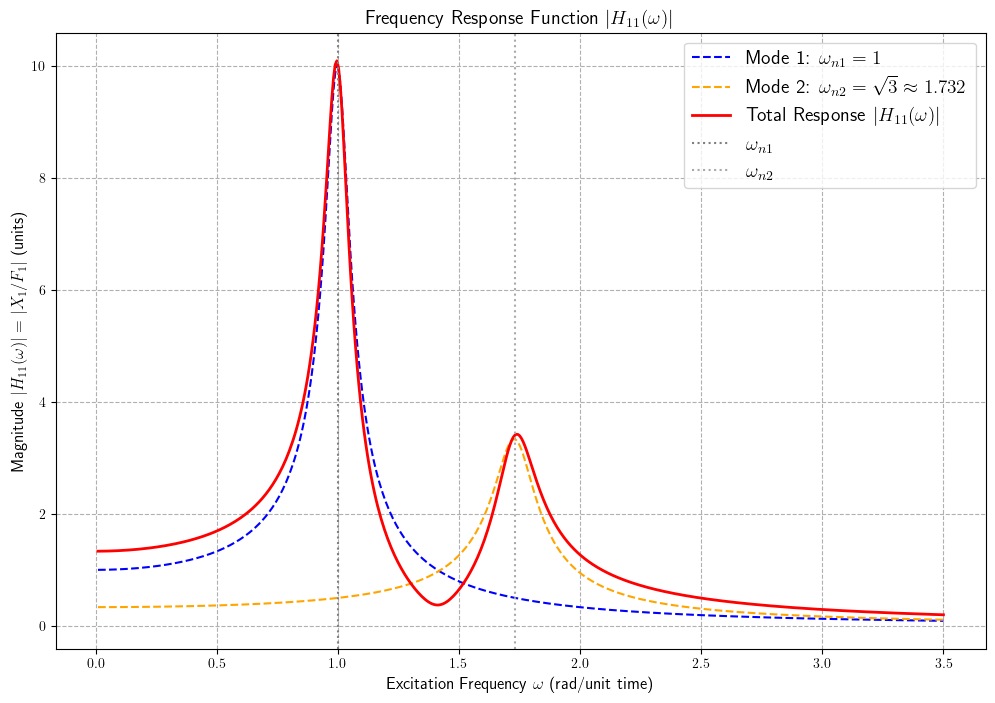

In [17]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True
# === System Parameters ===
# Natural Frequencies (rad/unit time)
omega_n1 = 1.0
omega_n2 = np.sqrt(3)

# Squared Natural Frequencies
omega_n1_sq = omega_n1**2
omega_n2_sq = omega_n2**2

# Damping Ratio (zeta = 5% for all modes)
zeta = 0.05

# Modal Properties (for H_11, i.e., response at m1 due to force at m1)
# Mode shapes: X1 = [1, 1], X2 = [1, -1]
# Phi_1r (displacement of m1 in mode r)
phi_11 = 1.0
phi_12 = 1.0

# Modal Mass (M_r) - calculated in thought as 1 for both modes
M_1 = 1.0
M_2 = 1.0

# === Frequency Response Calculation ===
# Frequency range (up to 3.5 rad/unit time to clearly capture both modes)
omega = np.linspace(0.01, 3.5, 500)

def FrequencyResponse(omega, omega_n, zeta, modal_mass, phi_1r):
    """Calculates the frequency response function for a single mode (H_11 component)."""
    # Denominator D_r = M_r * (omega_nr^2 - omega^2 + 2*i*zeta*omega_nr*omega)
    # The term phi_1r^2/M_r is the Modal Participation Factor for H_11
    D_r = modal_mass * (omega_n**2 - omega**2 + 2j * zeta * omega_n * omega)
    return phi_1r**2 / D_r

# Mode 1 FRF (H_11)
H_11_mode1 = FrequencyResponse(omega, omega_n1, zeta, M_1, phi_11)

# Mode 2 FRF (H_11)
H_11_mode2 = FrequencyResponse(omega, omega_n2, zeta, M_2, phi_12)

# Total FRF (H_11) is the sum of the modal FRFs
H_11_total = H_11_mode1 + H_11_mode2

# === Plotting ===
plt.figure(figsize=(12, 8))

# Plot magnitude of individual and total FRFs
plt.plot(omega, np.abs(H_11_mode1), label=r'Mode 1: $\omega_{n1}=1$', linestyle='--', color='blue')
plt.plot(omega, np.abs(H_11_mode2), label=r'Mode 2: $\omega_{n2}=\sqrt{3} \approx 1.732$', linestyle='--', color='orange')
plt.plot(omega, np.abs(H_11_total), label=r'Total Response $|H_{11}(\omega)|$', color='red', linewidth=2)

# Set labels and title
plt.title(r'Frequency Response Function $|H_{11}(\omega)|$', fontsize=14)
plt.xlabel(r'Excitation Frequency $\omega$ (rad/unit time)', fontsize=12)
plt.ylabel(r'Magnitude $|H_{11}(\omega)| = |X_1/F_1|$ (units)', fontsize=12)

# Add vertical lines for natural frequencies
plt.axvline(omega_n1, color='gray', linestyle=':', label=r'$\omega_{n1}$')
plt.axvline(omega_n2, color='darkgray', linestyle=':', label=r'$\omega_{n2}$')

plt.grid(True, which="both", ls="--")
plt.legend(fontsize=14)
plt.savefig('frf_plot.png')
print("frf_plot.png")